In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
# Step 1: Data Loading and Preprocessing
data = pd.read_csv('Train_data.csv')

# Assuming 'Classification' column contains the labels (1 for inhibitor, 0 for substrate)
X = data['Reported_Value']
y = data['Classification']

# Generate Morgan fingerprints from SMILES
def smiles_to_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        return np.array(list(map(int, fingerprint.ToBitString())))
    else:
        return np.zeros(2048, dtype=int)


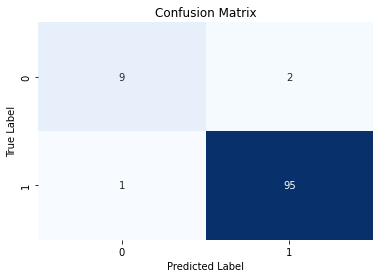

Accuracy: 0.9719626168224299


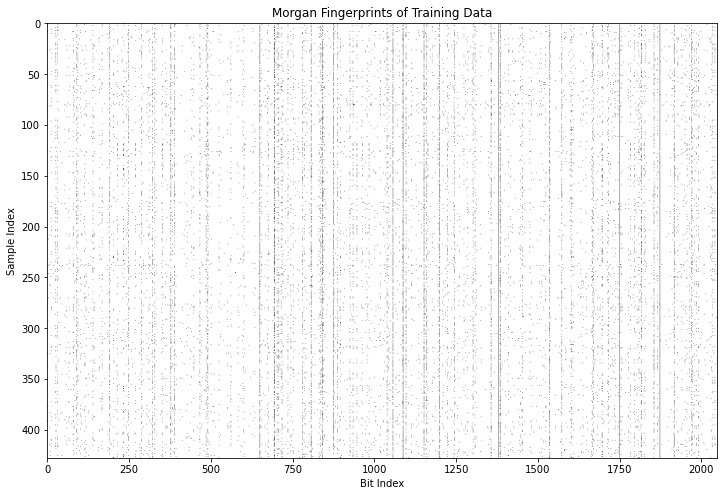

In [3]:
data['Fingerprint'] = data['Smiles'].apply(smiles_to_morgan_fingerprint)

# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(data['Fingerprint'].tolist(), y, test_size=0.2, random_state=42)

# Step 3: Model Training
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 5: Visualization
# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
print(f'Accuracy: {accuracy}')

# Receiver Operating Characteristic (ROC) curve (optional)
# Note: ROC curve is not applicable for SVM with a linear kernel
# If using a different classifier, you can plot the ROC curve

# Plotting the molecular fingerprints (optional)
plt.figure(figsize=(12, 8))
plt.imshow(X_train, aspect='auto', cmap='binary')
plt.title('Morgan Fingerprints of Training Data')
plt.xlabel('Bit Index')
plt.ylabel('Sample Index')
plt.show()


In [7]:
# Step 1: Load the Unseen Data
unseen_data = pd.read_csv('Test.csv')

# Step 2: Preprocess the Unseen Data
unseen_data['Fingerprint'] = unseen_data['Smiles'].apply(smiles_to_morgan_fingerprint)

# Step 3: Use the Trained Model to Predict
X_unseen = unseen_data['Fingerprint'].tolist()
y_unseen_pred = clf.predict(X_unseen)

# Optional: If true labels are available for evaluation
y_unseen_true = unseen_data['Classification']  # Replace 'True_Label_Column' with the actual column name

# Step 4: Evaluate Predictions
accuracy_unseen = accuracy_score(y_unseen_true, y_unseen_pred)
conf_matrix_unseen = confusion_matrix(y_unseen_true, y_unseen_pred)

# Print the evaluation metrics
print(f'Accuracy on Unseen Data: {accuracy_unseen}')
print('Confusion Matrix on Unseen Data:')
print(conf_matrix_unseen)


Accuracy on Unseen Data: 0.9390243902439024
Confusion Matrix on Unseen Data:
[[11  5]
 [ 0 66]]
